In [29]:
import pandas as pd


In [30]:
yelp = pd.read_csv('/content/yelp.csv')

In [31]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [32]:
yelp.shape

(10000, 10)

In [33]:
yelp['stars'].value_counts()

,count
stars,
4,3526
5,3337
3,1461
2,927
1,749


In [34]:
yelp['stars'].value_counts()*(0.02)

,count
stars,
4,70.52
5,66.74
3,29.22
2,18.54
1,14.98


In [35]:
total_sum = 0
for i in yelp['stars'].value_counts()*(0.02):
  total_sum += i

print(total_sum)

199.99999999999997


In [36]:
df = yelp[['review_id','stars','text']]

In [37]:
df.head()

,review_id,stars,text
0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...
1,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...
2,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...
3,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...


In [38]:
df_grouped_by_stars = df.groupby('stars')

In [39]:
df_grouped_by_stars.get_group(1)

,review_id,stars,text
23,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...
31,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...
35,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as..."
61,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...
64,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...
...,...,...,...
9924,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.
9931,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...
9953,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di..."
9984,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...


In [40]:
df_grouped_by_stars.get_group(5)

,review_id,stars,text
0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...
1,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...
3,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...
6,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...
...,...,...,...
9990,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...
9991,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...
9992,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...
9994,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...


In [41]:
total_samples = 200
star_counts = yelp['stars'].value_counts()
star_proportions = star_counts / len(yelp)
sample_sizes = (star_proportions * total_samples).round().astype(int)

stratified_sample = pd.DataFrame()
for star, count in sample_sizes.items():
    star_group = df[df['stars'] == star]
    sampled_stars = star_group.sample(n=count, random_state=42)
    stratified_sample = pd.concat([stratified_sample, sampled_stars])

print(f"Shape of the original data: {df.shape}")
print(f"Shape of the stratified sample: {stratified_sample.shape}")
print("Original 'stars' distribution:")
print(yelp['stars'].value_counts(normalize=True))
print("Stratified sample 'stars' distribution:")
print(stratified_sample['stars'].value_counts(normalize=True))

Shape of the original data: (10000, 3)
Shape of the stratified sample: (201, 3)
Original 'stars' distribution:
stars
4    0.3526
5    0.3337
3    0.1461
2    0.0927
1    0.0749
Name: proportion, dtype: float64
Stratified sample 'stars' distribution:
stars
4    0.353234
5    0.333333
3    0.144279
2    0.094527
1    0.074627
Name: proportion, dtype: float64


In [42]:
stratified_sample.head()

,review_id,stars,text
957,93OcCc6MfpuuMRIr15YFbA,4,Loved the location at atmosphere of this place...
6677,BpKazDy9V-ITVR5vJfqqog,4,I'm not sure how I've missed trying this place...
9698,1NnqnOiV_totNbpK0YA-gw,4,Not much to write here. I always park on the S...
2147,vBnGjrTvITilgRQ6_8W16g,4,There's not much more I can say about Rula tha...
885,qTuisLGKbQCXLlUZUeGciQ,4,Want a unique date night? Craving for somethi...


In [43]:
stratified_sample = stratified_sample.sample(frac=1, random_state=42)
print("Shuffled stratified sample head:")
stratified_sample.head()

Shuffled stratified sample head:


,review_id,stars,text
3315,2gfW7UgSeSAkxTXT60Ye_w,5,I've been meaning to try this place for months...
8016,FSFkimdBRyZ3fEDbosRaLA,4,I went to Khai Hoan yesterday and ordered the ...
1055,_pmYOW52o5wenplbAcu5wA,4,"Lame joke alert :\nOkay, I think I have switch..."
7066,PL3HnzeZAu4CD8ibLCAlpQ,3,Average airport. \n\nI wish gate Marques liste...
6447,AkT0DEKYnpkG9SyXDG05ng,5,"My wife and I just got married at Blackstone, ..."


In [44]:
stratified_sample['stars'].value_counts()

,count
stars,
4,71
5,67
3,29
2,19
1,15


In [45]:
stratified_sample.shape

(201, 3)

In [51]:
from google.colab import userdata
api_key = userdata.get('GEMINI_API_KEY')

In [52]:
from google import genai

client = genai.Client(api_key=api_key)


In [48]:
from pydantic import BaseModel, RootModel, Field

class ReviewAnalysis(BaseModel):
    """
    Schema for classifying Yelp reviews.
    Enforces a strict 1-5 integer rating and a text explanation.
    """
    predicted_stars: int = Field(
        ...,
        ge=1,
        le=5,
        description="The predicted star rating (1, 2, 3, 4, or 5) derived from the sentiment of the review."
    )
    explanation: str = Field(
        ...,
        description="A brief, 1-2 sentence reasoning justifying the rating based on specific phrases in the text."
    )

In [53]:
from typing import List

class BatchReviewAnalysis(RootModel[List[ReviewAnalysis]]):
   pass

reviews = [
    {"review_id": r.review_id, "text": r.text}
    for r in stratified_sample.itertuples(index=False)
]

prompt = f"""
You are an expert at interpreting Yelp reviews and assigning accurate star ratings.

For each review:
- Assess overall sentiment polarity and strength.
- Consider explicit praise, complaints, and intensifying language.
- Choose the most appropriate star rating from 1 to 5.

Use internal reasoning if helpful, but do NOT include any reasoning steps in the output.

Return only a JSON array.
Each element must strictly follow this schema:
- predicted_stars: integer between 1 and 5
- explanation: concise 1–2 sentence justification grounded in phrases from the review

Do not include any text outside the JSON array.

Reviews:
{reviews}
"""

response = client.models.generate_content(
    model="gemini-3-flash-preview",
    contents=prompt,
    config={
        "response_mime_type": "application/json",
        "response_json_schema": BatchReviewAnalysis.model_json_schema(),
    },
)

validated = BatchReviewAnalysis.model_validate_json(response.text)

results_df = pd.DataFrame({
    "review_id": stratified_sample["review_id"].values,
    "actual_stars": stratified_sample["stars"].values,
    "predicted_stars": [r.predicted_stars for r in validated.root],
    "explanation": [r.explanation for r in validated.root],
})


In [54]:
results_df.head()

,review_id,actual_stars,predicted_stars,explanation
0,2gfW7UgSeSAkxTXT60Ye_w,5,5,The reviewer praises the food as delicious and...
1,FSFkimdBRyZ3fEDbosRaLA,4,4,The reviewer highlights amazing spring rolls a...
2,_pmYOW52o5wenplbAcu5wA,4,5,The experience is described as 'delightful' wi...
3,PL3HnzeZAu4CD8ibLCAlpQ,3,3,The reviewer labels the airport as 'average' a...
4,AkT0DEKYnpkG9SyXDG05ng,5,5,The reviewer is 'still amazed' by the tireless...


In [55]:
accuracy = (results_df["actual_stars"] == results_df["predicted_stars"]).mean()

mae = (results_df["actual_stars"] - results_df["predicted_stars"]).abs().mean()

json_validity_rate = 1.0

In [56]:
eval_zero_shot = {
    "technique": "zero_shot_batch",
    "num_samples": len(results_df),
    "accuracy": accuracy,
    "mean_absolute_error": mae,
    "json_validity_rate": json_validity_rate
}

In [57]:
eval_zero_shot = pd.DataFrame([eval_zero_shot])

In [58]:
eval_zero_shot.head()

,technique,num_samples,accuracy,mean_absolute_error,json_validity_rate
0,zero_shot_batch,201,0.646766,0.368159,1.0


In [59]:
few_shot_examples = [
    {
        "text": "Bad... food was horrible... do not waste your time or money",
        "stars": 1,
        "reasoning": "Strong negative sentiment ('worst', 'horrible')."
    },
    {
        "text": "Pretty decent food. Friendliness of staff is hit or miss.",
        "stars": 3,
        "reasoning": "Mixed sentiment. Highlights good and bad points."
    },
    {
        "text": "The perfect burger. Awesome BBQ! NEVER a bad meal!",
        "stars": 5,
        "reasoning": "Unconditional positive praise."
    }
]


In [60]:
examples_block = "\n\n".join(
    f"""Review:
"{ex["text"]}"
Correct Rating:
{ex["stars"]}
Explanation:
{ex["reasoning"]}"""
    for ex in few_shot_examples
)

prompt = f"""
You are an expert at interpreting customer reviews and assigning accurate star ratings.

Below are examples of Yelp reviews with their correct ratings and brief explanations.

{examples_block}

Now, analyze each of the following reviews.

For every review:
- Determine the most appropriate star rating from 1 to 5 based on sentiment and wording.
- Provide a short explanation grounded in specific phrases from the review.

Return a JSON array.
Each element must strictly follow this schema:
- predicted_stars (integer between 1 and 5)
- explanation (1–2 sentences)

Do not include anything outside the JSON array.

Reviews:
{reviews}
"""

In [61]:
response = client.models.generate_content(
    model="gemini-3-flash-preview",
    contents=prompt,
    config={
        "response_mime_type": "application/json",
        "response_json_schema": BatchReviewAnalysis.model_json_schema(),
    },
)

validated = BatchReviewAnalysis.model_validate_json(response.text)

In [62]:
results_few_shot_df = pd.DataFrame({
    "review_id": stratified_sample["review_id"].values,
    "actual_stars": stratified_sample["stars"].values,
    "predicted_stars": [r.predicted_stars for r in validated.root],
    "explanation": [r.explanation for r in validated.root],
})

In [63]:
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd

accuracy = accuracy_score(
    results_few_shot_df["actual_stars"],
    results_few_shot_df["predicted_stars"]
)

mae = mean_absolute_error(
    results_few_shot_df["actual_stars"],
    results_few_shot_df["predicted_stars"]
)

eval_few_shot = pd.DataFrame([{
    "technique": "few_shot_batch_k5",
    "num_samples": len(results_few_shot_df),
    "accuracy": accuracy,
    "mean_absolute_error": mae,
    "json_validity_rate": 1.0
}])

In [64]:
eval_few_shot

,technique,num_samples,accuracy,mean_absolute_error,json_validity_rate
0,few_shot_batch_k5,201,0.651741,0.363184,1.0


In [65]:
reviews = [
    {"review_id": r.review_id, "text": r.text}
    for r in stratified_sample.itertuples(index=False)
]

prompt = f"""
You are an expert Yelp review analyst.

Your task is to assign the most accurate star rating (1–5) for each review by carefully
reasoning about sentiment strength, consistency, and specificity.

For each review, internally follow this reasoning process:

1. Identify the dominant sentiment:
   - Strongly negative
   - Mildly negative
   - Mixed / neutral
   - Mildly positive
   - Strongly positive

2. Look for intensity markers:
   - Strong negatives: words like "worst", "terrible", "awful", "never again"
   - Strong positives: words like "amazing", "perfect", "best", "always great"
   - Mild sentiment: hedging phrases like "okay", "pretty good", "not bad", "hit or miss"

3. Check sentiment consistency:
   - If complaints dominate → lower rating
   - If praise dominates with no major complaints → higher rating
   - If both are present → mid-range rating (2–4)

4. Map sentiment to stars:
   - 1★: Strongly negative, clear dissatisfaction
   - 2★: Mostly negative with minor positives
   - 3★: Mixed or neutral experience
   - 4★: Mostly positive with minor issues
   - 5★: Strongly positive, enthusiastic praise

Use this reasoning internally, step by step.

Do NOT include any reasoning, steps, or analysis in the output.

Return only a JSON array.
Each element must strictly follow this schema:
- predicted_stars: integer between 1 and 5
- explanation: concise 1–2 sentence justification grounded in specific phrases from the review

Do not include any text outside the JSON array.

Reviews:
{reviews}
"""


In [66]:
response = client.models.generate_content(
    model="gemini-3-flash-preview",
    contents=prompt,
    config={
        "response_mime_type": "application/json",
        "response_json_schema": BatchReviewAnalysis.model_json_schema(),
    },
)

validated = BatchReviewAnalysis.model_validate_json(response.text)

In [67]:
results_cot_df = pd.DataFrame({
    "review_id": stratified_sample["review_id"].values,
    "actual_stars": stratified_sample["stars"].values,
    "predicted_stars": [r.predicted_stars for r in validated.root],
    "explanation": [r.explanation for r in validated.root],
})

In [68]:
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd

accuracy = accuracy_score(
    results_cot_df["actual_stars"],
    results_cot_df["predicted_stars"]
)

mae = mean_absolute_error(
    results_cot_df["actual_stars"],
    results_cot_df["predicted_stars"]
)

eval_cot = pd.DataFrame([{
    "technique": "chain_of_thought_batch",
    "num_samples": len(results_cot_df),
    "accuracy": accuracy,
    "mean_absolute_error": mae,
    "json_validity_rate": 1.0
}])

In [69]:
eval_df = pd.concat(
    [eval_zero_shot, eval_few_shot, eval_cot],
    ignore_index=True
)

In [70]:
eval_cot

,technique,num_samples,accuracy,mean_absolute_error,json_validity_rate
0,chain_of_thought_batch,201,0.61194,0.412935,1.0


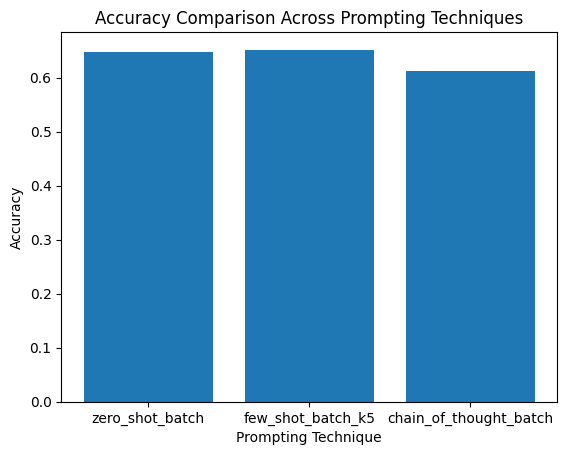

In [71]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(eval_df["technique"], eval_df["accuracy"])
plt.xlabel("Prompting Technique")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Prompting Techniques")
plt.show()

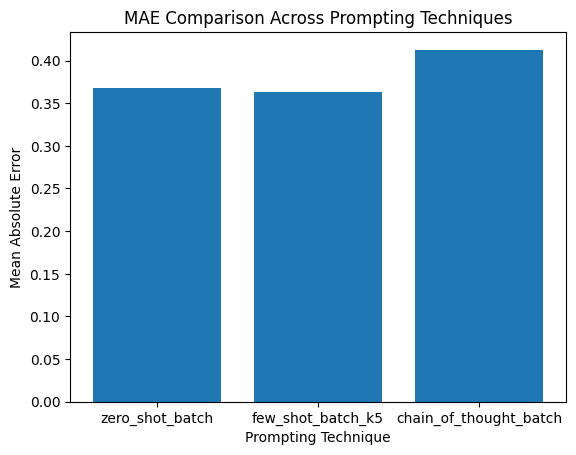

In [72]:
plt.figure()
plt.bar(eval_df["technique"], eval_df["mean_absolute_error"])
plt.xlabel("Prompting Technique")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison Across Prompting Techniques")
plt.show()

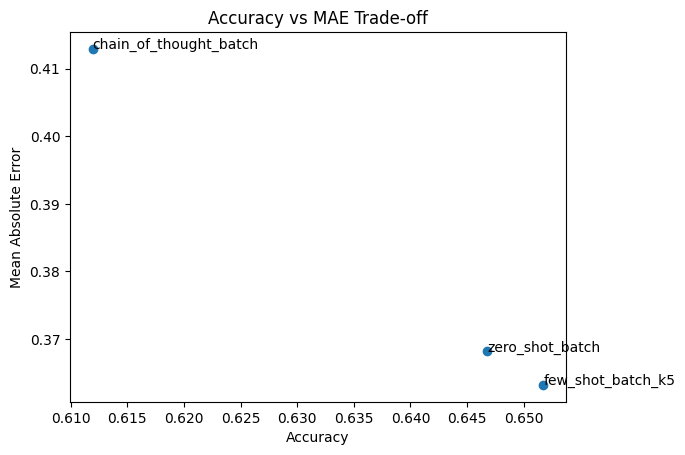

In [73]:
plt.figure()
plt.scatter(
    eval_df["accuracy"],
    eval_df["mean_absolute_error"]
)

for _, row in eval_df.iterrows():
    plt.text(row["accuracy"], row["mean_absolute_error"], row["technique"])

plt.xlabel("Accuracy")
plt.ylabel("Mean Absolute Error")
plt.title("Accuracy vs MAE Trade-off")
plt.show()

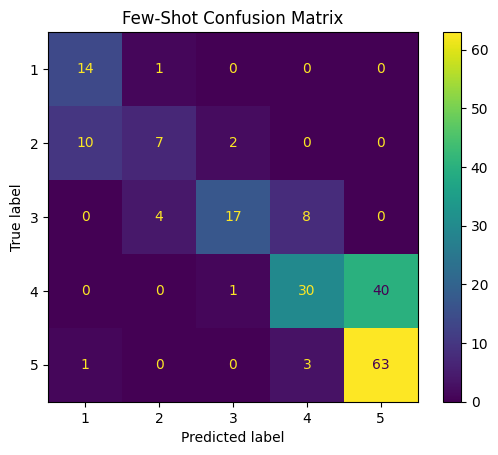

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    results_few_shot_df["actual_stars"],
    results_few_shot_df["predicted_stars"],
    labels=[1, 2, 3, 4, 5]
)
plt.title("Few-Shot Confusion Matrix")
plt.show()

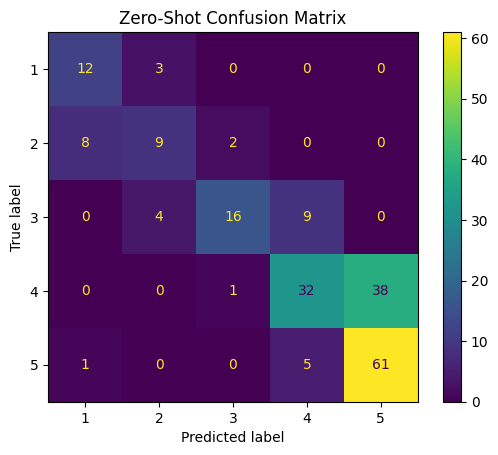

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    results_df["actual_stars"],
    results_df["predicted_stars"],
    labels=[1, 2, 3, 4, 5]
)
plt.title("Zero-Shot Confusion Matrix")
plt.show()


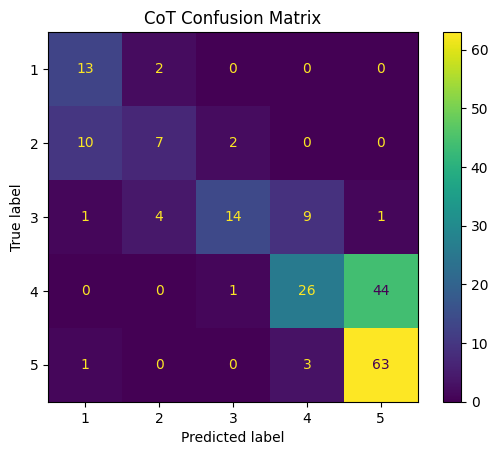

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    results_cot_df["actual_stars"],
    results_cot_df["predicted_stars"],
    labels=[1, 2, 3, 4, 5]
)
plt.title("CoT Confusion Matrix")
plt.show()
